# Wine Quality Dataset Analysis 

## Project Overview

**Objective:**  
The primary goal of this wine quality dataset analysis is to understand the relationship between physicochemical properties and perceived wine quality, identify influential features and reduce dimensionality with Principal Component Analysis (PCA), and evaluate predictive performance using regression models.

**Python Libraries Used for Analysis:**  
NumPy, Pandas, Matplotlib, Seaborn, scikit-learn





## Dataset Overview
The dataset used titled "wine_quality_white" was sourced from Penn Machine Learning Benchmarks (PMLB) through Github and contains 4898 different samples regarding the white variant of the Portuguese "Vinho Verde" wine. It includes 11 different features of physiochemical properties such as acidity, alcohol content, and residual sugar, with 1 target variable for wine quality score based on ratings by at least 3 wine experts. Specifically, the wine score ranged from 0 (bad) to 10 (excellent).

**Dataset Link** - [wine_quality_white](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white)


## Imports

Initial imports of python packages and libraries listed below for subsequent convenience.

In [61]:
import math
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score

In [62]:
#Import the Dataset
wineset = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz", sep='\t')
winesetdf = pd.DataFrame(wineset) #change to DataFrame 

sample = winesetdf.sample(n=10) #sample 10 random rows
sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4883,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.5,6
16,6.3,0.480,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6
2931,5.2,0.155,0.33,1.60,0.028,13.0,59.0,0.98975,3.30,0.84,11.9,8
2824,7.2,0.260,0.40,6.30,0.047,52.0,172.0,0.99573,3.18,0.53,9.5,6
3041,6.2,0.330,0.41,16.80,0.037,58.0,173.0,0.99882,3.25,0.57,9.4,6
3076,6.3,0.280,0.30,3.10,0.039,24.0,115.0,0.99420,3.05,0.43,8.6,5
644,6.4,0.240,0.29,11.40,0.051,32.0,166.0,0.99680,3.31,0.45,9.5,5
1564,9.1,0.280,0.49,2.00,0.059,10.0,112.0,0.99580,3.15,0.46,10.1,5
1369,7.4,0.640,0.47,14.15,0.168,42.0,185.0,0.99840,2.90,0.49,9.3,5
3067,7.3,0.280,0.42,1.20,0.033,29.0,142.0,0.99205,3.17,0.43,10.7,4


# EDA Section

An exploratory data analysis of the data set was performed to assess data quality, understand feature distributions and relationships through graphical representations, and identify any potential outliers. These insights assisted in data preprocessing and subsequent model selection.

### Feature Explanation

A list all of the columns was included with descriptions about each variable.

In [63]:
list(winesetdf.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

**fixed acidity** = a physiochemical property describing a wine's non-volatile acids that contribute to the taste, measured in grams of tartaric acid/dm^3 as stated in the referenced research publication

**volatile acidity** = a physiochemical property describing a wine's acids that can evaporate or indicate spoilage, measured in grams of acetic acid/dm^3 

**citric acid** = an attribute describing the citric acid concentration in the wine, measured in g/dm^3 

**residual sugar** = an attribute describing the leftover grape sugar after fermentation that contributes to sweetness, measured in g/dm^3 

**chlorides** = an attribute describing the salt concentration in the wine, measured in grams of sodium chloride/dm^3 

**free sulfur dioxide** = an attribute describing the amount of unbound sulfur dioxide in the wine that contributes to freshness, measured in mg/dm^3 

**total sulfur dioxide** = an attribute describing the total amount of both free and bound sulfur dioxide in the wine that contributes to freshness, measured in mg/dm^3  

**density** = a property describing the relationship of a wine's mass and volume, measured in grams of g/cm^3 

**pH** = a physiochemical property describing a wine's acidity or basicity, measured on a scale 0 to 14  

**sulphates** = an attribute describing a wine's concentration of sulphates, a compound that helps preservation measured in grams of potassium sulphate/dm^3 

**alcohol** = an attribute that measures the aount of ethanol in the wine, measured in %volume

**target** = an integer variable measured from 0-10 describing the wine quality score based on sensory data and calculated using the median of at least 3 evaluations made by wine experts

(All features were continuous variables except for "target" which had integer values)


### Data Structure and Summary Statistics

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


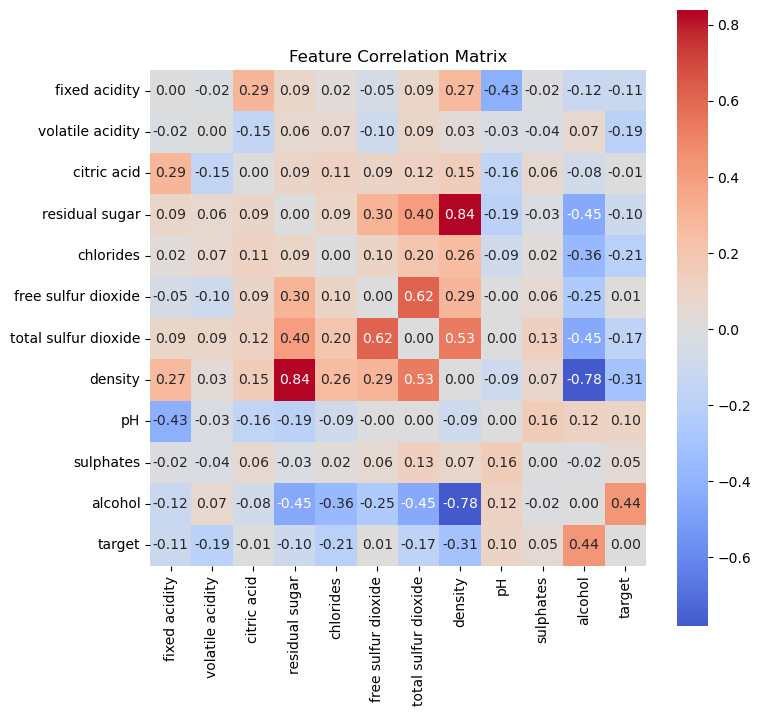

In [64]:
#Statistics
display(winesetdf.describe().T)

#Heatmap (self-correlations set at 0)
plt.figure(figsize=(8,8))
corr = winesetdf.corr()
np.fill_diagonal(corr.values, 0) 

sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt='.2f', square=True)
plt.title("Feature Correlation Matrix")
plt.show()

Several features exhibit strong correlations which was considered later in the use of PCA to address any multicollinearity. Density vs. residual sugar had the greatest positive correlation (0.84) while density vs. alcohol had the greatest negative correlation (-0.78).

### Univariate Feature Distributions



To understand the shape, spread, skew, and outliers of each physicochemical measurement, histograms were plotted for all columns with brief descriptions. This helps to identify any non-normality present in the data, which could influence later methods like standardization, PCA, and linear modeling.

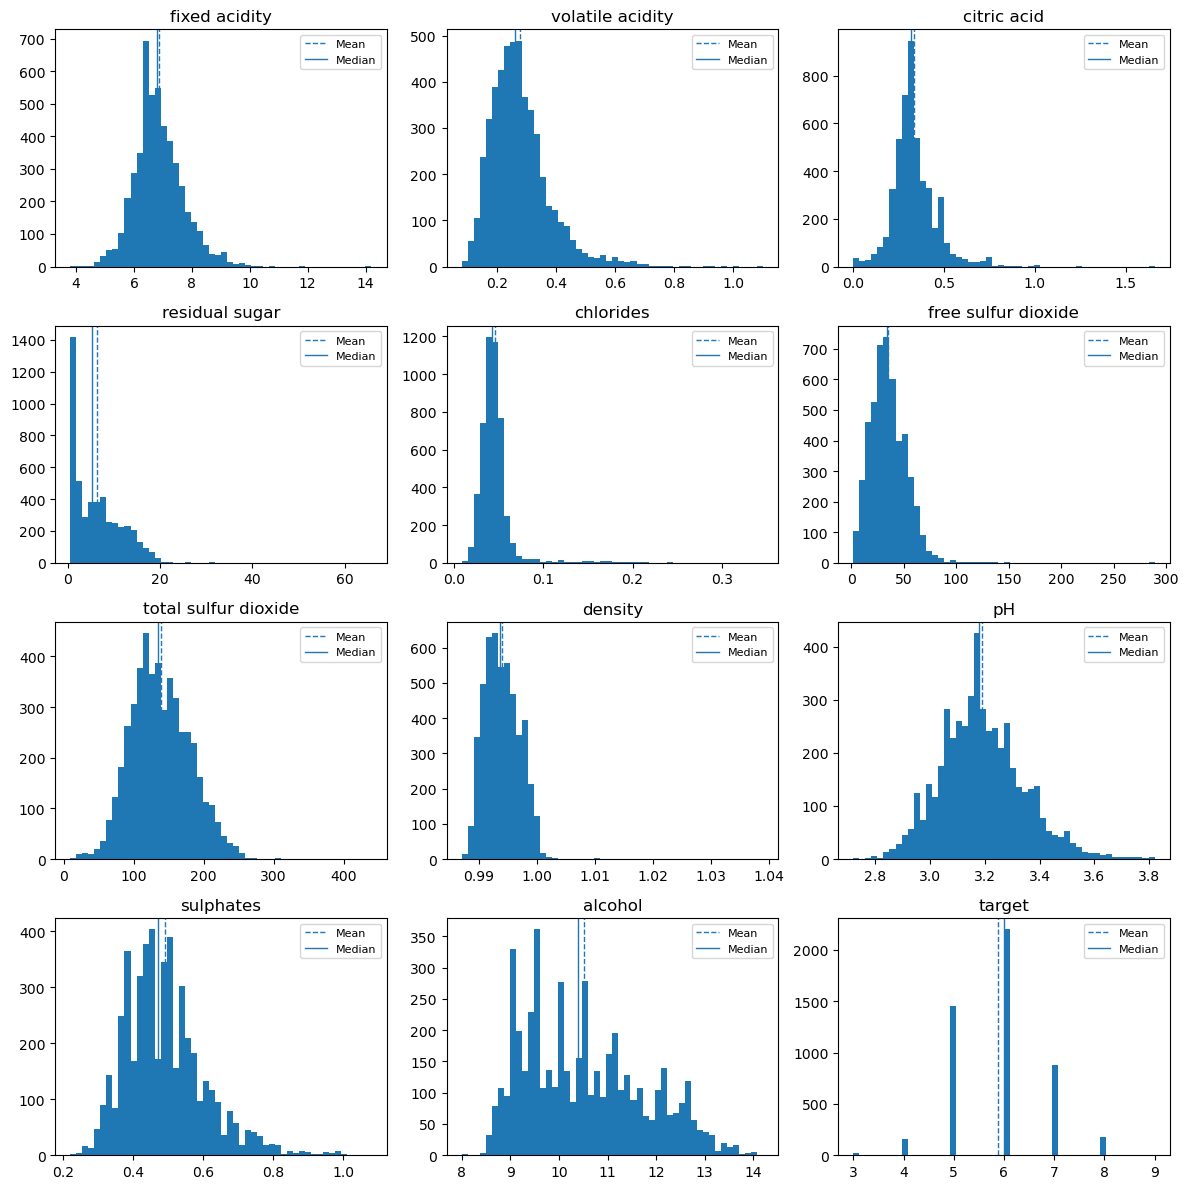

In [65]:
#12 features, 4x3 grid
figure, subplot = plt.subplots(4, 3, figsize=(12,12)) #create empty subplots with 4x3 grid
subplot = subplot.flatten() #collapse 4x3 array into a 1D array to easier iterate

for i, feature in enumerate(winesetdf.columns): #loop over dataset
    subplot[i].hist(winesetdf[feature], bins=50) #create hist for each feature in their own subplot[i]
    subplot[i].set_title(feature) 
    #vertical lines for mean and median
    subplot[i].axvline(winesetdf[feature].mean(), linestyle="--", linewidth=1, label="Mean")
    subplot[i].axvline(wineset[feature].median(), linestyle="-", linewidth=1, label="Median")
    subplot[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

**fixed acidity** = Normal (Gaussian) distribution, fairly symmetric

**volatile acidity** = Continuous right-skewed (positive) distribution

**citric acid** = Continuous, slightly right-skewed distribution

**residual sugar** = Continuous, significant right-skewed distribution, almost exponential-like 

**chlorides** = Continuous, slightly right-skewed distribution

**free sulfur dioxide** = Continuous, approximately normal distribution

**total sulfur dioxide** = Normal (Gaussian) distribution

**density** = Normal (Gaussian) distribution

**pH** = Normal (Gaussian) distribution

**sulphates** = Continuous, right-skewed distribution

**alcohol** = Continuous, right-skewed distribution (possibly bimodal but no real second distinct peak)

**target** = Discrete (categorical) distribution, noticeable negative skew

### Feature-Target Relationships

To assess whether individual physicochemical features exhibit dependence on wine quality, each input feature was plotted against the target variable. Visual inspection would assist in identifying any correlations present.

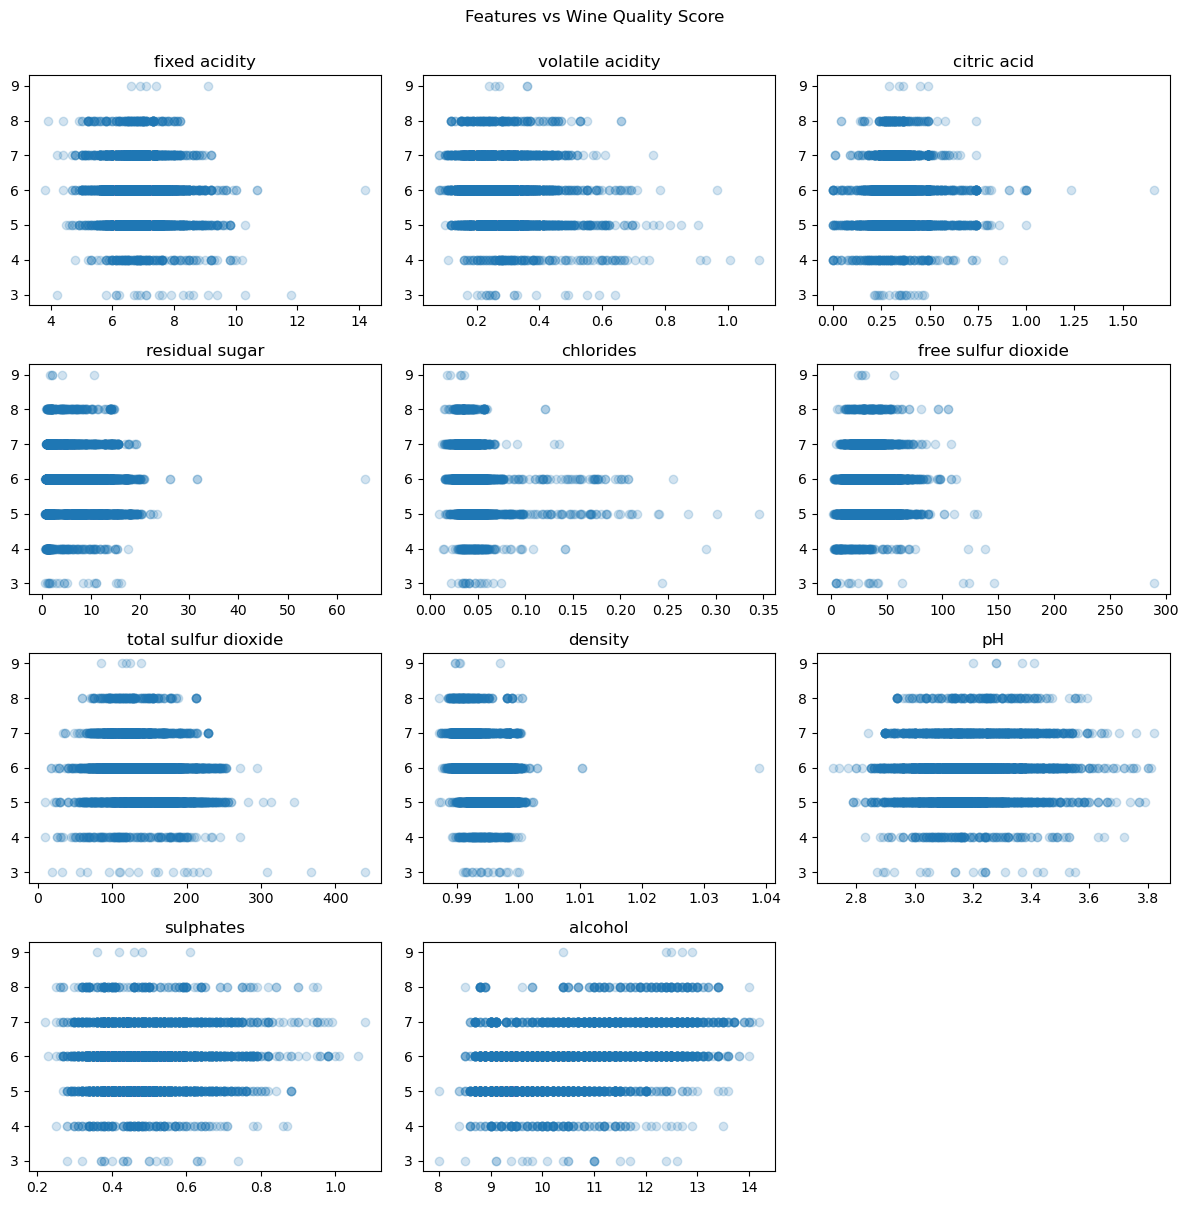

In [66]:
testfeatures = winesetdf.drop('target', axis=1) #all columns in DF except target
figure, subplot = plt.subplots(4, 3, figsize=(12,12)) #create empty subplots with 4x3 grid
subplot = subplot.flatten() #collapse 4x3 array into a 1D array to easier iterate


for i, feature in enumerate(testfeatures.columns):
    subplot[i].scatter(testfeatures[feature], winesetdf['target'], alpha=0.2)
    subplot[i].set_title(feature) 

#delete empty subplot
for j in range(len(testfeatures.columns), len(subplot)): #specifies 12th subplot
    figure.delaxes(subplot[j]) #index number 11

figure.suptitle('Features vs Wine Quality Score', y=1.00)
plt.tight_layout()
plt.show()                    

**Observed Relationships of Interest**

**volatile acidity** = Volatile acidity and wine quality score seem weakly dependent because lower ranges of volatile acidity values seem to correlate with higher wine quality scores.

**citric acid** = Citric acid and wine quality score seem to be weakly dependent because higher wine quality scores seem to favor citric acid ranges of 0.25-0.5, whereas lower scores are more spread throughout acid ranges 0-0.75

**residual sugar** = Residual sugar and wine quality score exhibit slight dependence because higher wine quality scores somewhat cluster around residual sugar ranges of 0-10, whereas lower scores are more spread throughout acid ranges 0-20.

**density** = Density and wine quality score exhibit a weak negative trend, because higher wine quality scores seem to favor a lower density cluster of 0.895-0.995, whereas lower scores are more spread throughout acid ranges 0.99-1.00

**sulphates** = Sulfates and wine quality score seem to be weakly dependent because higher wine quality scores seem to favor a lower sulphates cluster of 0.3-0.5, whereas lower scores are more spread throughout acid ranges 0.2-0.8 

**alcohol** = Alcohol and wine quality score exhibit the most observed dependence because higher wine quality scores tend to cluster at alcohol values of 11-13, whereas lower scores are more spread throughout acid ranges 8-14 


# Modeling
An ordinary least squares regression method was first selected and plotted for the target using all the input columns. The model was then evaluated using k-fold cross-validation to assess generalization performance. 


Training RMSE: 0.7504359153109987


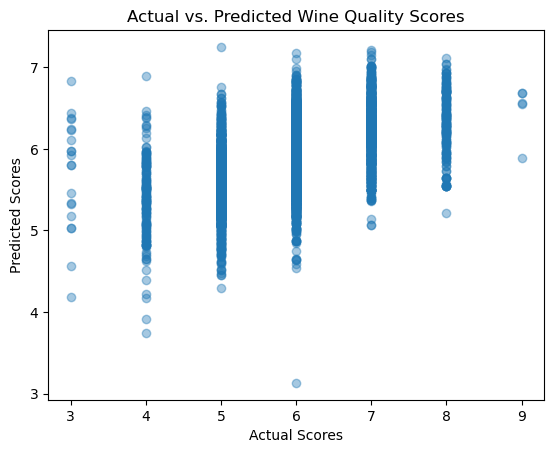

CV RMSE = 0.76


In [67]:
from sklearn.linear_model import LinearRegression

X = winesetdf.drop('target', axis=1) #DataFrame of only features
Y = winesetdf['target'] #Y target variable

mymodel = LinearRegression() #gives us a fresh untrained model
mymodel.fit(X,Y) #fit does the actual regression

Predicted = mymodel.predict(X) #calculate wine score predictions based on regressed model

#Training RMSE 
RMSE = np.sqrt(((Predicted-Y)**2).mean())
print(f"Training RMSE: {RMSE}")

#PLOT 
plt.scatter(Y, Predicted, alpha=0.4)
plt.title('Actual vs. Predicted Wine Quality Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

#K-fold Cross-Validation and RMSE
cv_score = cross_val_score(mymodel, X, Y, cv=5, scoring = 'neg_root_mean_squared_error')

#REPORT CV score
print(f'CV RMSE = {-cv_score.mean():.2f}') 

The training RMSE is reported for reference; model performance is evaluated using 5-fold cross-validation RMSE to estimate generalization error. Both scores were very similar which suggests good generalization ability for the linear model.

The calculated CV RMSE concludes that on average, predictions are off by 0.76 quality points. Given that quality scores are integer values on an ordinal scale, an RMSE below 1.0 indicates reasonably accurate predictive performance.

## Principal Components Analysis

Principal Component Analysis (PCA) was applied to reduce dimensionality and address multicollinearity. A linear regression model was then trained using the first half of the principal components, which together explain a substantial portion of the total feature variance. Model performance was evaluated using RMSE and compared against a baseline regression using all original features.


Data variation explained by first half PC's: 0.7283
PCA Regression MSE: 0.8030
Linear Regression MSE: 0.7504


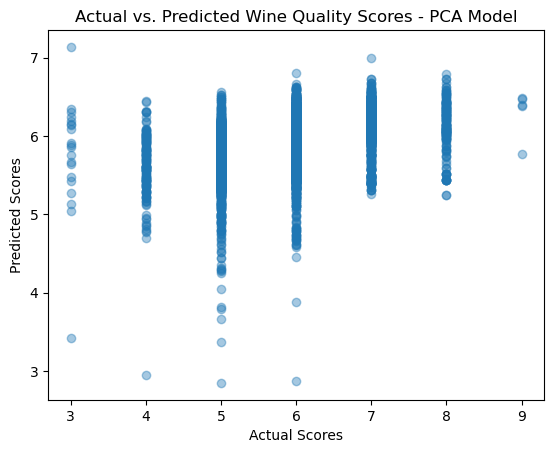

In [68]:
#Set X and y, and scale features
pcacolumns = [c for c in winesetdf.columns if winesetdf[c].dtype == 'float64']
X = wineset[pcacolumns].copy()
y = winesetdf['target'].copy()

pcadf_scaled = StandardScaler().fit_transform(X)

#Fit PCA 
winepca = PCA()
winepca.fit(pcadf_scaled)
pca_resultstable = pd.DataFrame(winepca.components_, columns=pcacolumns) #convert to DF with .components_ (11 PCA x 11 features)
        #Shows table of weights for each of the 11 features, that overall make up one PCA number 
explained_ratio = winepca.explained_variance_ratio_

# Calculate sum of variance of HALF the total PC's
pc_var = winepca.explained_variance_ratio_ #array of the PC's
half = len(pc_var)//2  #first half of PC's = 5
variationhalf = pc_var[:half].sum()
print(f"Data variation explained by first half PC's: {variationhalf:.4f}")


#STEP 2 - Linear Regression
PC_persample = winepca.transform(pcadf_scaled) # 4898 x 11 PCs, same thing as (centered @ pca_resultstable.T)
half = PC_persample.shape[1] //2 # also 5
PC_half = PC_persample[:, :half]


model = LinearRegression()
model.fit(PC_half, winesetdf['target']) #build linreg using 1st half PC and target 
model_pred = model.predict(PC_half) #calculate predictions

rmse = np.sqrt(((model_pred-winesetdf['target'])**2).mean()) #predict-actual 
print(f"PCA Regression MSE: {rmse:.4f}") #used first 5 PCS, and made linreg model 
print(f"Linear Regression MSE: {RMSE:.4f}") #used all 11 features to make model

#STEP 3 - Plot
plt.scatter(winesetdf['target'], model_pred, alpha=0.4) #actual vs predicted wine quality scores using PCA
plt.title('Actual vs. Predicted Wine Quality Scores - PCA Model')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

### Performance Based on PC's

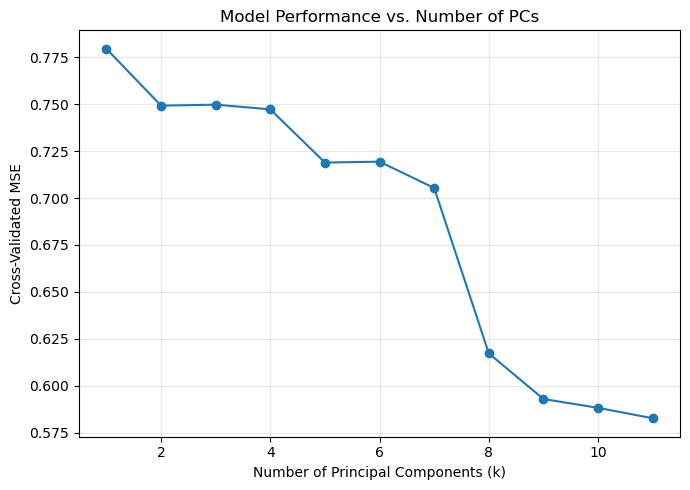

In [69]:
#Determine the best number of PC's with cross-validated MSE per k

max_k = pcadf_scaled.shape[1]
mse_by_k = []

for k in range(1, max_k + 1):
    mse_k = -cross_val_score(
        LinearRegression(),
        pcadf_scaled[:, :k],
        y,
        scoring="neg_mean_squared_error",
    ).mean()
    mse_by_k.append(mse_k)

#plot number of PCs vs CV MSE 
plt.figure(figsize=(7,5))
plt.plot(range(1, max_k + 1), mse_by_k, marker='o')
plt.xlabel("Number of Principal Components (k)")
plt.ylabel("Cross-Validated MSE")
plt.title("Model Performance vs. Number of PCs")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Cross-validated performance improves substantially up to 8 principal components, after which gains diminish. Therefore, PCA was performed again with k = 8 selected as a tradeoff between model complexity and performance.

PCA (k=8) Train RMSE: 0.7901
Linear Regression RMSE: 0.7504
PCA (k=8) CV RMSE: 0.7919


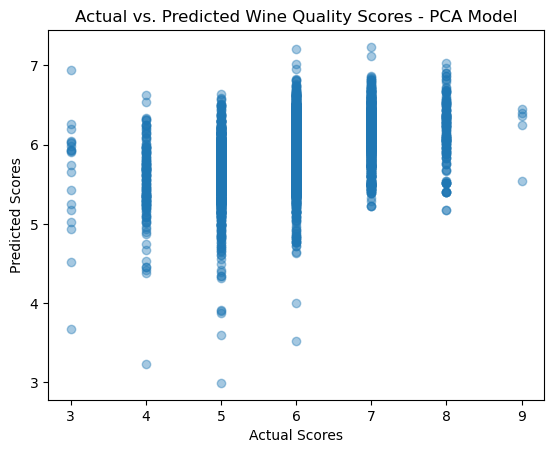

In [71]:
#PCA using PC's k=8 
PC_persample = winepca.transform(pcadf_scaled) # 4898 x 11 PCs, same thing as (centered @ pca_resultstable.T)
PC_k = PC_persample[:, :8] #k=8


model = LinearRegression()
model.fit(PC_k, winesetdf['target']) #build linreg using 1st half PC and target 
model_pred = model.predict(PC_k) #calculate predictions

train_rmse = np.sqrt(((model_pred - winesetdf['target'])**2).mean())
print(f"PCA (k=8) Train RMSE: {train_rmse:.4f}")
print(f"Linear Regression RMSE: {RMSE:.4f}") #used all 11 features to make model

#Cross-validated RMSE
cv_split = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse_scores = -cross_val_score(
    LinearRegression(),
    PC_k,
    winesetdf["target"],
    cv=cv_split,
    scoring="neg_root_mean_squared_error"
)

print(f"PCA (k=8) CV RMSE: {cv_rmse_scores.mean():.4f}")

#STEP 3 - Plot
plt.scatter(winesetdf['target'], model_pred, alpha=0.4) #actual vs predicted wine quality scores using PCA
plt.title('Actual vs. Predicted Wine Quality Scores - PCA Model')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

### Interpretation 
Although eight principal components capture a more substantial portion of total feature variance, the PCA regression returns slightly higher RMSE than the baseline linear regression using all features (0.79 > 0.75). This indicates that the latter principal components still have some predictive value that are discarded during dimensionality reduction.

## Results Summary 
- **Key influential features**: The strongest relationships with wine quality were alcohol content and volatile acidity. Correlation and regression performed indicated that alcohol positively contributes to predicted quality, while volatile acidity has a negative association.

- **PCA effectiveness**: The first eight principal components were chosen for PCA analysis based on model performance. However, some performance improved when more PCs were included which suggests more predictive value in later PC's.

- **Model performance**: The baseline linear regression model achieved a cross-validated RMSE of 0.7504, outperforming the PCA regression with k=8 (CV RMSE = 0.7919). However, the small gap between training and cross-validated RMSE in the PCA model indicates stable generalization without overfitting.

- **Insights gained**: While PCA effectively reduces dimensionality and mitigates multicollinearity, variance preservation does not necessarily lead to best predictive importance. Thus, for this dataset, retaining all original features such as in a linear model yields slightly better predictive accuracy than reduced PCA representations.


## Limitations 

- Wine quality scores are subjective and can vary between the wine quality expert evaluators.

- Linear models may not be able to capture any nonlinear relationships between the chemical properties.

- No external validation dataset was available for testing generalization.

## Future Work

- Explore regularized regression models (Ridge, Lasso) to evaluate whether shrinking coefficients improves predictive stability comapared to PCA.

- 	Investigate nonlinear models (e.g., Random Forest, Gradient Boosting) to capture potential nonlinear relationships between wine physiochemical properties and quality.


## Conclusion
Overall, this project demonstrates how exploratory analysis, dimensionality reduction, and regression modeling can be applied to a structured dataset to extract insights and evaluate predictive performance. While PCA provided a low-dimensional representation with decent predictive performance, the full-feature linear model achieved the strongest predictive accuracy for this dataset.

### References Section
Joseph D. Romano, Le, Trang T., William La Cava, John T. Gregg, Daniel J. Goldberg, Praneel Chakraborty, Natasha L. Ray, Daniel Himmelstein, Weixuan Fu, and Jason H. Moore. PMLB v1.0: an open source dataset collection for benchmarking machine learning methods. arXiv preprint arXiv:2012.00058 (2020).